In [1]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [2]:
from google_play_scraper import Sort, reviews_all

suomi112_reviews = reviews_all(
    'fi.digia.suomi112',
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [3]:
suomi112_reviews

[{'reviewId': 'b917340b-aff1-4172-951d-fecbffbab64f',
  'userName': 'kitty exe has stopped working',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ACNPEu8viUy9SY4lCoY08irHPC5FNYAivMLg7w4I6iVjgw',
  'content': 'Very useful. Can defenetly save lives.',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '4.3.3',
  'at': datetime.datetime(2022, 10, 19, 17, 50, 43),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': '15b807cc-2afe-411e-82c2-e57065f0a7ae',
  'userName': 'John',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ACNPEu9YGDexpcu1Cyk_pmPqNQoDdsvecd9-KedyNyiE2Q',
  'content': 'Trafikmeddelande kommer ofta endast på Finska, och om de kommer på svenska så är det när varningen inte längre är relevant... Har inte använt några av de andra funktionerna så kan inte ge någon recension för resten av appen',
  'score': 3,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '4.3.3',
  'at': datetime.datetime(2022, 10, 13, 15, 46, 43),
  'replyContent': None

In [4]:
header = ['reviewId', 'userName', 'userImage', 'content','score','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt' ]

import csv
with open('suomi112.csv', 'w', encoding="utf-8") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = header)
    writer.writeheader()
    writer.writerows(suomi112_reviews)
        #([review.userName, review.content, review.score, review.at, review.reviewCreatedVersion])

In [5]:
df_suomi = pd.read_csv('suomi112.csv')

In [6]:
df_suomi = df_suomi[["userName", "content", "score", "reviewCreatedVersion", "at"]]

In [7]:
df_suomi

,userName,content,score,reviewCreatedVersion,at
0,kitty exe has stopped working,Very useful. Can defenetly save lives.,5,4.3.3,2022-10-19 17:50:43
1,John,"Trafikmeddelande kommer ofta endast på Finska,...",3,4.3.3,2022-10-13 15:46:43
2,Uuno Turhapuro,Akun säästämiseksi sovellus voisi tukea tummaa...,3,4.3.3,2022-08-22 16:49:48
3,Lasse Reinikainen,"Sovellus on käyttökelvoton, koska se ruinaa ka...",1,4.3.3,2022-07-20 10:13:00
4,Nuolipyssy klipit,i killed my dog änd i tindint ket eny help.,1,2.0.19433,2022-05-21 22:45:47
...,...,...,...,...,...
100,A Google user,Tämän tason sovelluksen tulisi pakottaa sijain...,4,1.0.119,2015-06-18 14:40:23
101,A Google user,"Hyvä idea, toteutukselta toivon jatkossa enemm...",3,1.0.119,2015-06-18 06:47:14
102,A Google user,Toimii Jollassa ihan nätisti. Oikeaa hätäpuhel...,4,1.0.119,2015-06-17 19:43:11
103,A Google user,Miksi ohjelma tarvitsee käyttäjän puhelinnumer...,4,1.0.119,2015-06-17 12:22:42


In [8]:
from deep_translator import GoogleTranslator

contents = df_suomi['content'].values.tolist();
translated = []

for i in contents:
    translated.append(GoogleTranslator(source='auto', target='en').translate(i))

df_suomi['content'] = translated


In [9]:
df_suomi

,userName,content,score,reviewCreatedVersion,at
0,kitty exe has stopped working,Very useful. Can defenetly save lives.,5,4.3.3,2022-10-19 17:50:43
1,John,Traffic announcements often only come in Finni...,3,4.3.3,2022-10-13 15:46:43
2,Uuno Turhapuro,"To save battery, the app could support a dark ...",3,4.3.3,2022-08-22 16:49:48
3,Lasse Reinikainen,The application is unusable because it crashes...,1,4.3.3,2022-07-20 10:13:00
4,Nuolipyssy klipit,i killed my dog änd i tindint ket eny help.,1,2.0.19433,2022-05-21 22:45:47
...,...,...,...,...,...
100,A Google user,An app at this level should force location ser...,4,1.0.119,2015-06-18 14:40:23
101,A Google user,"Good idea, I hope for more from the implementa...",3,1.0.119,2015-06-18 06:47:14
102,A Google user,It works very nicely in Jolla. I haven't made ...,4,1.0.119,2015-06-17 19:43:11
103,A Google user,Why does the program need the user's phone num...,4,1.0.119,2015-06-17 12:22:42


In [10]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
reviews = df_suomi['content'].values.tolist();

In [13]:
reviews

['Very useful. Can defenetly save lives.',
 "Traffic announcements often only come in Finnish, and if they come in Swedish, that's when the warning is no longer relevant... Haven't used any of the other functions so can't give a review for the rest of the app",
 "To save battery, the app could support a dark theme. The user interface of the application differs from the usual Android applications. The application could follow Android's native components in terms of user interface. Using location information in the background significantly increases battery consumption. It certainly wouldn't be a big job to localize the application also into Russian, Estonian, French, German, etc...",
 "The application is unusable because it crashes every two seconds to enable Google location services. Answering no thanks doesn't help.",
 'i killed my dog änd i tindint ket eny help.',
 "I opened the app to see how it works. There is no question that he would have let an emergency call be made. First, ten

In [14]:
analyzer = SentimentIntensityAnalyzer()
sentiments = []

for sentence in reviews:
    vs = analyzer.polarity_scores(sentence)
    
    #print(vs["compound"])
    if(vs["compound"] >= 0.05):
        sentiments.append(1) 
    elif(vs["compound"] > -0.05):
        sentiments.append(0)
    elif(vs["compound"] <= -0.05):
        sentiments.append(-1) 


#print(type(df_suomi["content"]))
df_suomi["sentiment"] = sentiments

#df_suomi.insert(2,'sentiment', sentiment )

In [15]:
df_suomi

,userName,content,score,reviewCreatedVersion,at,sentiment
0,kitty exe has stopped working,Very useful. Can defenetly save lives.,5,4.3.3,2022-10-19 17:50:43,1
1,John,Traffic announcements often only come in Finni...,3,4.3.3,2022-10-13 15:46:43,-1
2,Uuno Turhapuro,"To save battery, the app could support a dark ...",3,4.3.3,2022-08-22 16:49:48,1
3,Lasse Reinikainen,The application is unusable because it crashes...,1,4.3.3,2022-07-20 10:13:00,-1
4,Nuolipyssy klipit,i killed my dog änd i tindint ket eny help.,1,2.0.19433,2022-05-21 22:45:47,-1
...,...,...,...,...,...,...
100,A Google user,An app at this level should force location ser...,4,1.0.119,2015-06-18 14:40:23,0
101,A Google user,"Good idea, I hope for more from the implementa...",3,1.0.119,2015-06-18 06:47:14,1
102,A Google user,It works very nicely in Jolla. I haven't made ...,4,1.0.119,2015-06-17 19:43:11,1
103,A Google user,Why does the program need the user's phone num...,4,1.0.119,2015-06-17 12:22:42,1


In [16]:
import nltk
import spacy
import unicodedata
#from contractions import contractions_dict
import re
from nltk.corpus import wordnet
import collections
#from textblob import Word
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en_core_web_sm')
# nlp_vec = spacy.load('en_vectors_web_lg', parse=True, tag=True, entity=True)



def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    if bool(soup.find()):
        [s.extract() for s in soup(['iframe', 'script'])]
        stripped_text = soup.get_text()
        stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    else:
        stripped_text = text
    return stripped_text


#def correct_spellings_textblob(tokens):
#	return [Word(token).correct() for token in tokens]  


def simple_porter_stemming(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text


def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens


# def expand_contractions(text, contraction_mapping=contractions_dict):
    
#     contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
#                                       flags=re.IGNORECASE|re.DOTALL)
#     def expand_match(contraction):
#         match = contraction.group(0)
#         first_char = match[0]
#         expanded_contraction = contraction_mapping.get(match)\
#                                 if contraction_mapping.get(match)\
#                                 else contraction_mapping.get(match.lower())                       
#         expanded_contraction = first_char+expanded_contraction[1:]
#         return expanded_contraction
        
#     expanded_text = contractions_pattern.sub(expand_match, text)
#     expanded_text = re.sub("'", "", expanded_text)
#     return expanded_text


def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]|\[|\]' if not remove_digits else r'[^a-zA-Z\s]|\[|\]'
    text = re.sub(pattern, '', text)
    return text


def remove_stopwords(text, is_lower_case=False, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def normalize_corpus(corpus, html_stripping=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_stemming=False, text_lemmatization=True, 
                     special_char_removal=True, remove_digits=True,
                     stopword_removal=True, stopwords=stopword_list):
    #contraction_expansion=True
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:

        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)

        # remove extra newlines
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)

        # expand contractions    
#         if contraction_expansion:
#             doc = expand_contractions(doc)

        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)

        # stem text
        if text_stemming and not text_lemmatization:
        	doc = simple_porter_stemming(doc)

        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)

         # lowercase the text    
        if text_lower_case:
            doc = doc.lower()

        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case, stopwords=stopwords)

        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
            
        normalized_corpus.append(doc)
        
    return normalized_corpus



In [17]:
import gensim
from gensim import corpora, models

def train_lda_model_gensim(corpus, total_topics=2):
    
    norm_tokenized_corpus = normalize_corpus(corpus)
    #print(norm_tokenized_corpus)
    dictionary = corpora.Dictionary(d.split() for d in norm_tokenized_corpus)
    mapped_corpus = [dictionary.doc2bow(text) 
                     for text in [d.split() for d in norm_tokenized_corpus]]
    tfidf = models.TfidfModel(mapped_corpus)
    corpus_tfidf = tfidf[mapped_corpus]
    lda = models.LdaModel(corpus_tfidf, 
                          id2word=dictionary,
                          iterations=1000,
                          num_topics=total_topics)
    return lda  

In [18]:
lda_gensim = train_lda_model_gensim(reviews,
                                    total_topics=10)

C:\Users\Kalpani Ranasinghe\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [19]:
def print_topics_gensim(topic_model, total_topics=1,
                        weight_threshold=0.0001,
                        display_weights=False,
                        num_terms=None):
    
    for index in range(total_topics):
        topic = topic_model.show_topic(index)
        topic = [(word, round(wt,2)) 
                 for word, wt in topic 
                 if abs(wt) >= weight_threshold]
        if display_weights:
            print('Topic #'+str(index+1)+' with weights')
            print(topic[:num_terms] if num_terms else topic)
        else:
            print('Topic #'+str(index+1)+' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms] if num_terms else tw)
        print()

In [20]:
print_topics_gensim(topic_model=lda_gensim,
                    total_topics=10,
                    num_terms=5,
                    display_weights=True)  

Topic #1 with weights
[('emergency', 0.01), ('useful', 0.01), ('clumsy', 0.01), ('slow', 0.01), ('fault', 0.01)]

Topic #2 with weights
[('good', 0.03), ('usefull', 0.01), ('beginning', 0.01), ('nothing', 0.01), ('especially', 0.01)]

Topic #3 with weights
[('shut', 0.01), ('immediately', 0.01), ('application', 0.01), ('android', 0.01), ('double', 0.01)]

Topic #4 with weights
[('phone', 0.01), ('notification', 0.01), ('work', 0.01), ('like', 0.01), ('confirm', 0.01)]

Topic #5 with weights
[('start', 0.01), ('immediately', 0.01), ('test', 0.01), ('number', 0.01), ('program', 0.01)]

Topic #6 with weights
[('useful', 0.01), ('nice', 0.01), ('recommend', 0.01), ('check', 0.01), ('program', 0.01)]

Topic #7 with weights
[('pointless', 0.01), ('luckily', 0.01), ('information', 0.01), ('great', 0.01), ('find', 0.01)]

Topic #8 with weights
[('start', 0.01), ('oneplus', 0.01), ('bug', 0.01), ('enter', 0.01), ('instantly', 0.01)]

Topic #9 with weights
[('case', 0.01), ('need', 0.01), ('prog

In [21]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

norm_corpus = normalize_corpus(reviews)

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = tfidf.fit_transform(norm_corpus)  
                 
# Define the number of topics or components
num_components=10

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components 
lda_components=model.components_

In [22]:
# Print the topics with their terms
terms = tfidf.get_feature_names()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['samsung', 'exact', 'clue', 'perfect', 'truck', 'chat', 'job']
Topic 1:  ['use', 'useful', 'phone', 'luckily', 'notification', 'application', 'start']
Topic 2:  ['good', 'idea', 'beginning', 'great', 'nice', 'case', 'application']
Topic 3:  ['program', 'emergency', 'notification', 'papa', 'die', 'send', 'location']
Topic 4:  ['message', 'decide', 'ill', 'tho', 'alert', 'copy', 'easy']
Topic 5:  ['location', 'map', 'test', 'phone', 'pointless', 'program', 'emergency']
Topic 6:  ['safety', 'install', 'fix', 'happen', 'number', 'gps', 'ask']
Topic 7:  ['phone', 'need', 'good', 'number', 'ask', 'hopefully', 'archipelago']
Topic 8:  ['work', 'usefull', 'crash', 'day', 'start', 'notification', 'need']
Topic 9:  ['app', 'immediately', 'come', 'update', 'shut', 'positioning', 'emergency']


C:\Users\Kalpani Ranasinghe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
tfidf_feature_names = tfidf.get_feature_names_out()

In [27]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

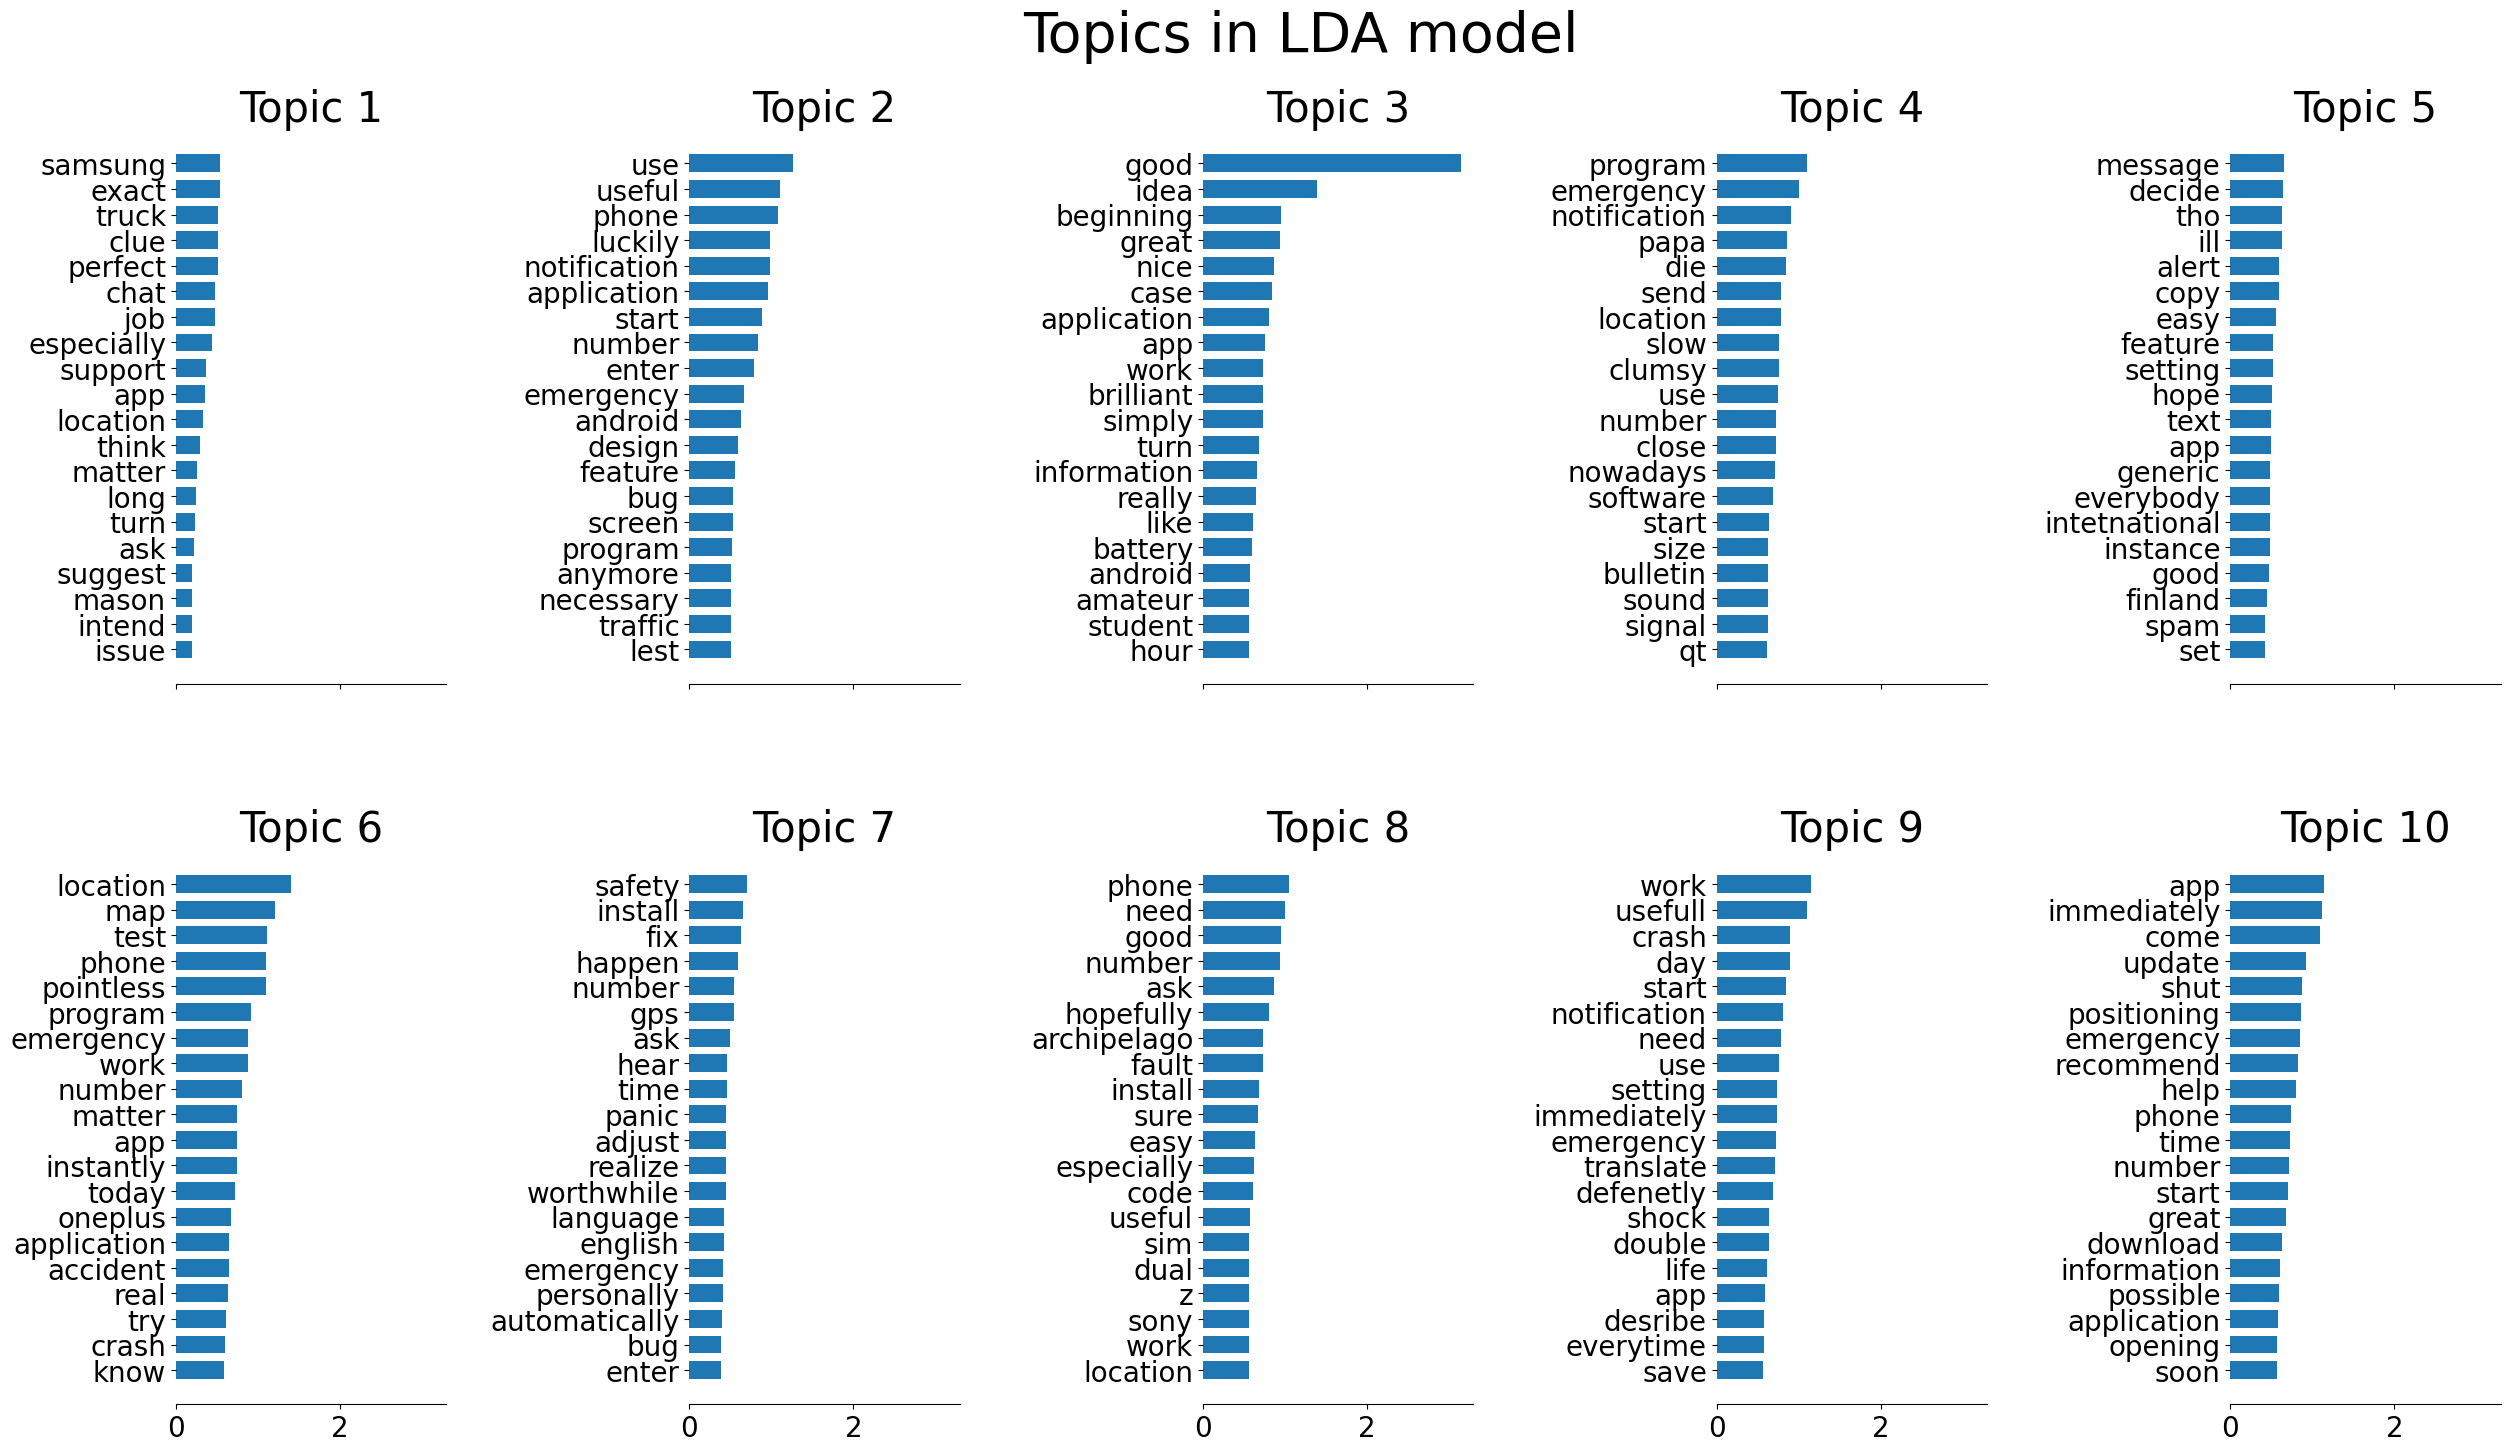

In [28]:
plot_top_words(model, tfidf_feature_names, 20, "Topics in LDA model")